In [1]:
#importing both the datasets
#Loading the monthly temperature data
library(readr)
monthly_data <- read_csv("nitm18442004.csv")
head(monthly_data)

Rows: 1932 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): x

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


x
<dbl>
4.5
2.4
4.8
9.1
10.9
12.9


In [2]:
#Loading the yearly temperature data
yearly_data <- read_csv("nity18442004.csv")
head(yearly_data)

Rows: 161 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): x

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


x
<dbl>
8.5
8.3
9.7
8.9
8.5
8.7


In [3]:
#Checking missing values for monthly data
missing_values=data.frame(null_values=colSums(is.na(monthly_data)))
missing_values

,null_values
,<dbl>
x,0


In [4]:
#Checking missing values for yearly data
missing_values=data.frame(null_values=colSums(is.na(yearly_data)))
missing_values

,null_values
,<dbl>
x,0


In [5]:
#Creating a date range for the monthly data
starting_date <- as.Date("1844-01-01")
ending_date <- as.Date("2004-12-01")
date_range <- seq(starting_date, ending_date, by = "month")

In [6]:
library(zoo)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [7]:
#Converting monthly_data to a data frame and add date column
monthly_data <- data.frame(date = date_range, temperature = coredata(monthly_data))
head(monthly_data)

,date,x
,<date>,<dbl>
1,1844-01-01,4.5
2,1844-02-01,2.4
3,1844-03-01,4.8
4,1844-04-01,9.1
5,1844-05-01,10.9
6,1844-06-01,12.9


In [8]:
# Load the ggplot2 package
library(ggplot2)

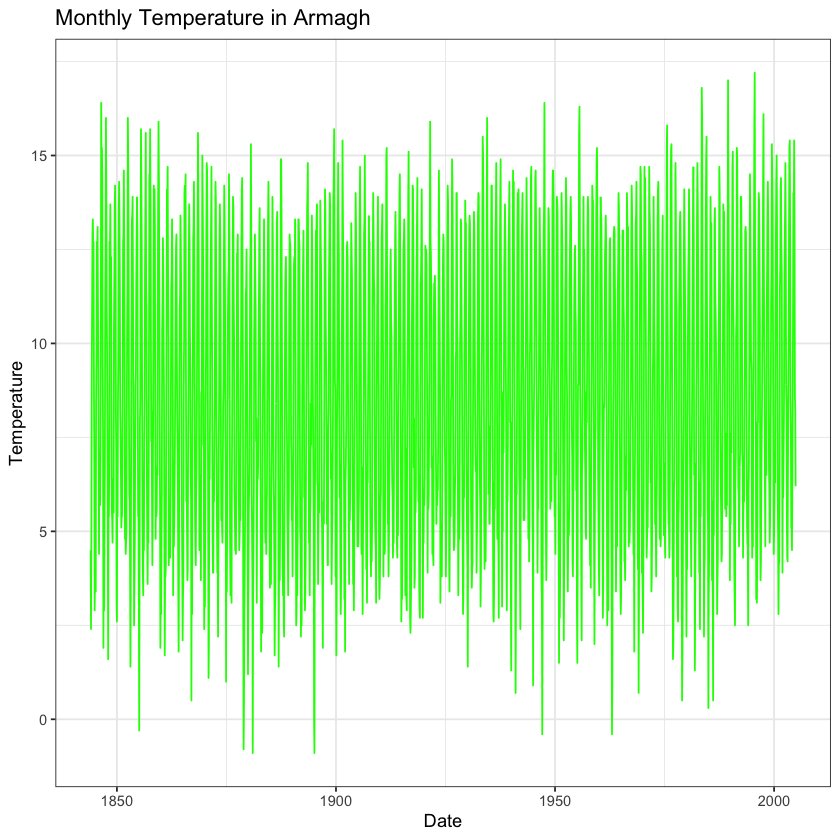

In [9]:
#plotting the monthly temperature
ggplot(data = monthly_data, aes(x = date, y = x)) +
  geom_line(color = "green") +
  labs(title = "Monthly Temperature in Armagh") +
  xlab("Date") + ylab("Temperature") +
  theme_bw()

In [10]:
#Creating a date range for the yearly data
start <- as.Date("1844-01-01")
end <- as.Date("2004-12-01")
daterange <- seq(start, end, by = "year")

In [11]:
#Converting yearly_data to a data frame and add date column
yearly_data <- data.frame(date = daterange, temperature = coredata(yearly_data))
head(yearly_data)

,date,x
,<date>,<dbl>
1,1844-01-01,8.5
2,1845-01-01,8.3
3,1846-01-01,9.7
4,1847-01-01,8.9
5,1848-01-01,8.5
6,1849-01-01,8.7


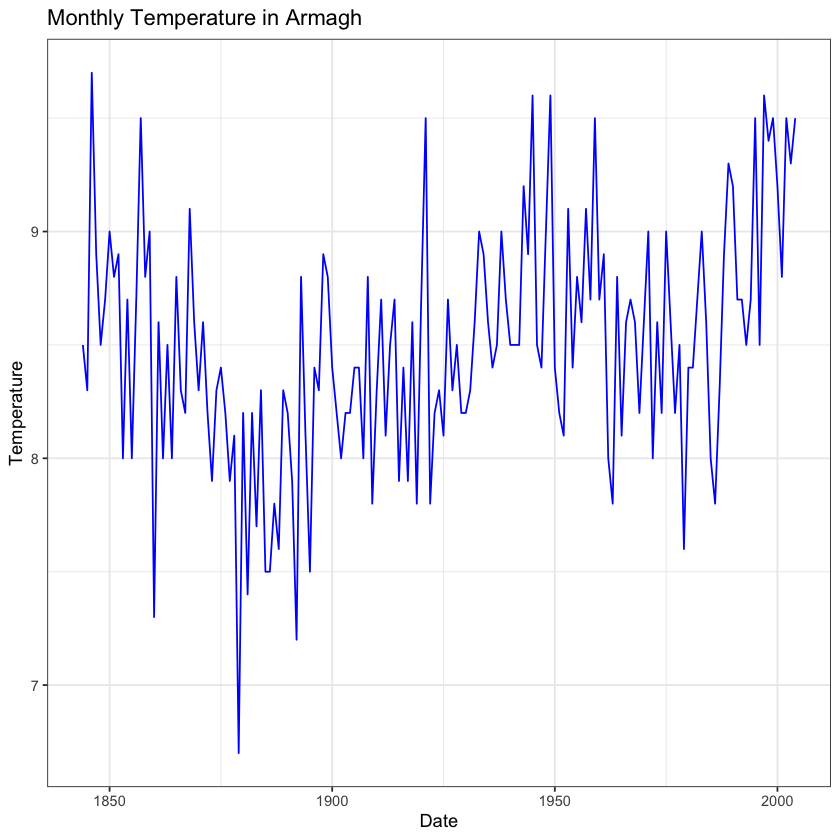

In [21]:
#plotting the yearly temperature
ggplot(data = yearly_data, aes(x = date, y = x)) +
  geom_line(color = "blue") +
  labs(title = "Monthly Temperature in Armagh") +
  xlab("Date") + ylab("Temperature") +
  theme_bw()

In [22]:
#Converting the data into a time series object on the monthly data
monthly_data_ts_object <- ts(monthly_data$x, frequency = 12, start = c(1844, 1))
#Decomposing the time series into trend, seasonal, and residual components
decomposed_monthly_data <- decompose(monthly_data_ts_object, type = "additive")

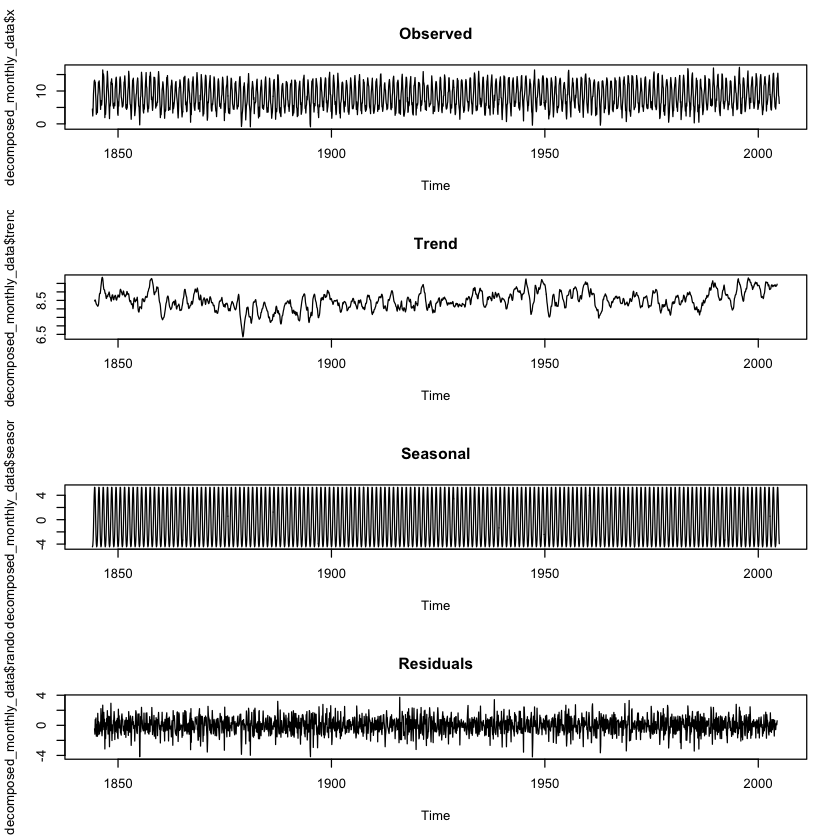

In [23]:
#Plotting the decomposed components
par(mfrow = c(4, 1))
plot(decomposed_monthly_data$x, main = "Observed")
plot(decomposed_monthly_data$trend, main = "Trend")
plot(decomposed_monthly_data$seasonal, main = "Seasonal")
plot(decomposed_monthly_data$random, main = "Residuals")

In [24]:
#Converting the data into a time series object on the yearly data
yearly_data_ts_object <-  ts(yearly_data$x, start = 1844,frequency=1)

In [25]:
#Splitting the data into training and test data-sets
train_data <- window(monthly_data_ts_object, end = c(2003, 12))
test_data <- window(monthly_data_ts_object, start = c(2004, 1))

In [27]:
#Fitting an ARIMA model to the training data for monthly data
library(forecast)
arima_model_monthly <- auto.arima(train_data,D=1)
summary(arima_model_monthly) 

Series: train_data 
ARIMA(1,0,2)(2,1,0)[12] 

Coefficients:
         ar1      ma1      ma2     sar1     sar2
      0.4985  -0.2939  -0.0163  -0.6724  -0.3172
s.e.  0.1546   0.1558   0.0430   0.0218   0.0219

sigma^2 = 1.854:  log likelihood = -3296.89
AIC=6605.79   AICc=6605.83   BIC=6639.11

Training set error measures:
                      ME     RMSE      MAE  MPE MAPE      MASE          ACF1
Training set 0.007377913 1.355579 1.051322 -Inf  Inf 0.7881509 -0.0002581779

In [28]:
forecast_data <- forecast(arima_model_monthly, h = 12)
forecast_data
print(forecast_data$mean)

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Jan 2004       4.682380  2.937393  6.427366  2.013653  7.351106
Feb 2004       4.802434  3.021291  6.583578  2.078410  7.526459
Mar 2004       5.894875  4.107465  7.682285  3.161268  8.628482
Apr 2004       7.888976  6.100012  9.677939  5.152992 10.624959
May 2004      10.621634  8.832284 12.410983  7.885060 13.358208
Jun 2004      12.568793 10.779348 14.358239  9.832073 15.305514
Jul 2004      14.212654 12.423185 16.002123 11.475897 16.949411
Aug 2004      14.870146 13.080671 16.659621 12.133380 17.606912
Sep 2004      12.840592 11.051116 14.630069 10.103824 15.577361
Oct 2004       9.720671  7.931194 11.510148  6.983903 12.457440
Nov 2004       7.947658  6.158181  9.737135  5.210889 10.684427
Dec 2004       4.754910  2.965433  6.544387  2.018141  7.491679

           Jan       Feb       Mar       Apr       May       Jun       Jul
2004  4.682380  4.802434  5.894875  7.888976 10.621634 12.568793 14.212654
           Aug       Sep       Oct       Nov       Dec
2004 14.870146 12.840592  9.720671  7.947658  4.754910


                      ME      RMSE      MAE      MPE    MAPE      MASE
Training set 0.007377913 1.3555788 1.051322     -Inf     Inf 0.7881509
Test set     0.266189709 0.7514175 0.605483 3.109118 7.15189 0.4539160
                      ACF1 Theil's U
Training set -0.0002581779        NA
Test set     -0.2879265087 0.3309661

	Ljung-Box test

data:  Residuals from ARIMA(1,0,2)(2,1,0)[12]
Q* = 90.821, df = 19, p-value = 2.372e-11

Model df: 5.   Total lags used: 24



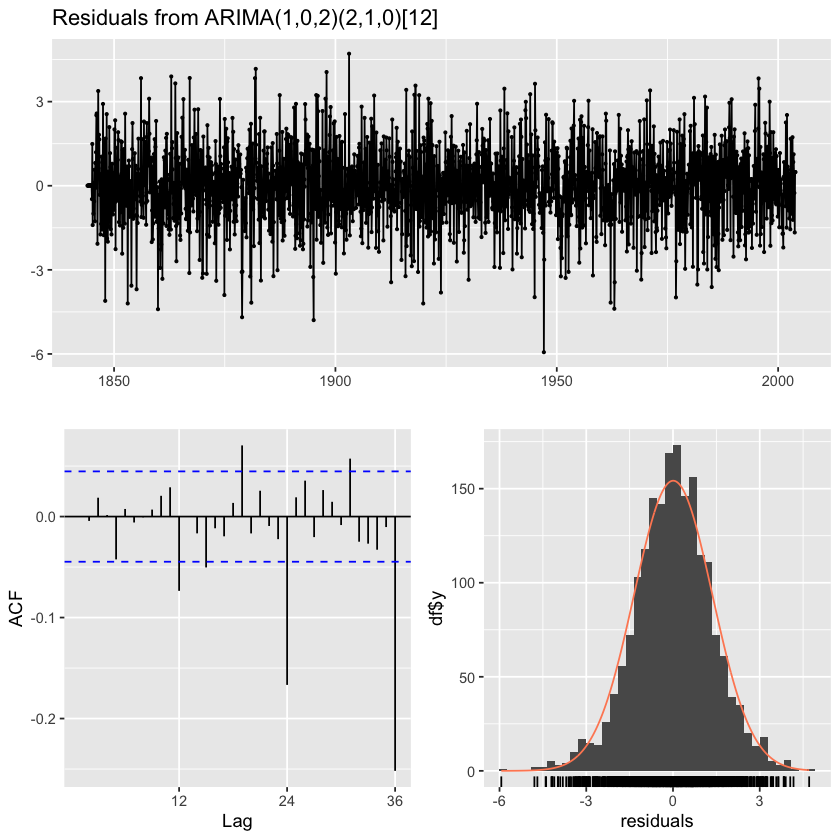

In [29]:
#Evaluating the forecasts against the actual data for 2004
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
#Residuals diagnostics
checkresiduals(arima_model_monthly)

In [30]:
#Exponential smoothing model
exponential_smoothing_model_monthly <- ets(train_data)
summary(exponential_smoothing_model_monthly)

ETS(A,A,A) 

Call:
 ets(y = train_data) 

  Smoothing parameters:
    alpha = 0.0267 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 9.0553 
    b = -0.0013 
    s = -3.9238 -2.4576 0.5863 3.4298 5.2013 5.384
           4.0052 1.2916 -1.4396 -3.3028 -4.2866 -4.4879

  sigma:  1.2163

     AIC     AICc      BIC 
15285.27 15285.59 15379.79 

Training set error measures:
                     ME     RMSE       MAE  MPE MAPE      MASE      ACF1
Training set 0.01770418 1.211239 0.9465906 -Inf  Inf 0.7096361 0.1908923

In [31]:
#Forecasting for 12 months using the fitted model
forecast_data <- forecast(exponential_smoothing_model_monthly, h = 12)
forecast_data
print(forecast_data$mean)

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Jan 2004       4.826801  3.268027  6.385575  2.442862  7.210740
Feb 2004       5.029996  3.470661  6.589330  2.645200  7.414791
Mar 2004       6.014942  4.455044  7.574840  3.629283  8.400601
Apr 2004       7.882274  6.321808  9.442741  5.495747 10.268802
May 2004      10.613344  9.052306 12.174383  8.225942 13.000747
Jun 2004      13.328619 11.767004 14.890234 10.940336 15.716903
Jul 2004      14.709242 13.147047 16.271437 12.320071 17.098414
Aug 2004      14.530972 12.968193 16.093752 12.140908 16.921037
Sep 2004      12.760338 11.196971 14.323706 10.369374 15.151303
Oct 2004       9.918806  8.354846 11.482766  7.526935 12.310676
Nov 2004       6.877779  5.313222  8.442335  4.484996  9.270561
Dec 2004       5.412854  3.847697  6.978011  3.019153  7.806555

           Jan       Feb       Mar       Apr       May       Jun       Jul
2004  4.826801  5.029996  6.014942  7.882274 10.613344 13.328619 14.709242
           Aug       Sep       Oct       Nov       Dec
2004 14.530972 12.760338  9.918806  6.877779  5.412854


                     ME      RMSE       MAE      MPE    MAPE      MASE
Training set 0.01770418 1.2112392 0.9465906     -Inf     Inf 0.7096361
Test set     0.17450272 0.7804156 0.6675100 1.792123 7.67026 0.5004161
                   ACF1 Theil's U
Training set  0.1908923        NA
Test set     -0.4164430 0.3343079

	Ljung-Box test

data:  Residuals from ETS(A,A,A)
Q* = 108.35, df = 24, p-value = 1.093e-12

Model df: 0.   Total lags used: 24



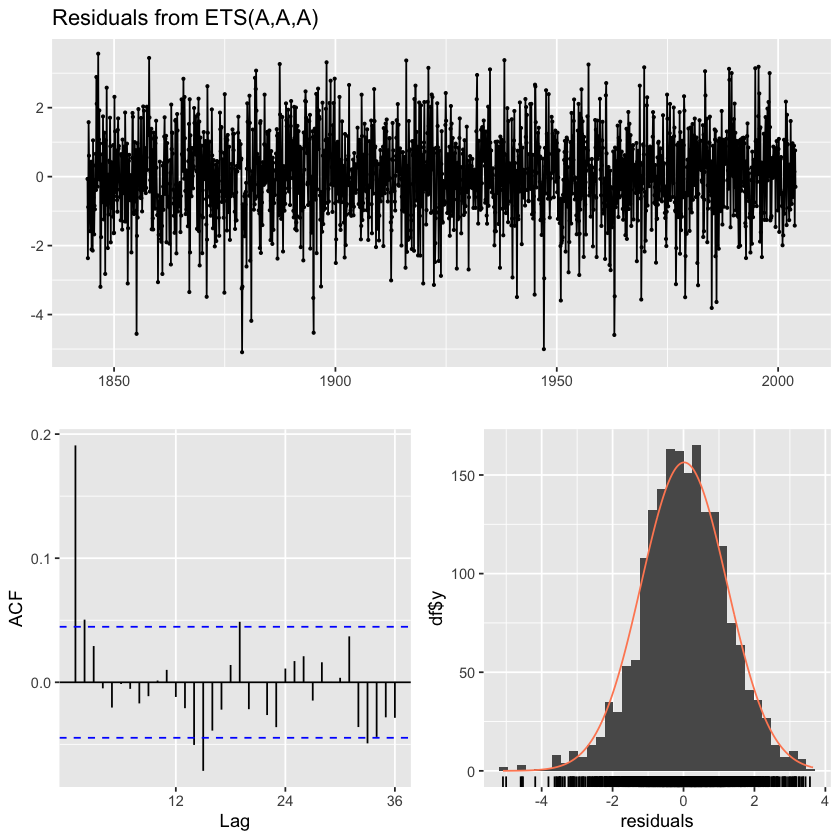

In [32]:
#Evaluating the forecasts against the actual data for 2004
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
#Residuals diagnostics
checkresiduals(exponential_smoothing_model_monthly)

             Length Class  Mode     
fitted       5754   mts    numeric  
x            1920   ts     numeric  
alpha           1   -none- numeric  
beta            1   -none- logical  
gamma           1   -none- logical  
coefficients    2   -none- numeric  
seasonal        1   -none- character
SSE             1   -none- numeric  
call            4   -none- call     

         Point Forecast       Lo 80     Hi 80       Lo 95     Hi 95
Jan 2004      3.1168884  -0.1054041  6.339181   -1.811183  8.044959
Feb 2004      1.1914706  -4.8374472  7.220388   -8.028964 10.411905
Mar 2004     -0.7339472 -10.4688526  9.000958  -15.622200 14.154306
Apr 2004     -2.6593651 -16.7528780 11.434148  -24.213533 18.894803
May 2004     -4.5847829 -23.5823186 14.412753  -33.639007 24.469441
Jun 2004     -6.5102007 -30.8943860 17.873985  -43.802594 30.782193
Jul 2004     -8.4356185 -38.6458128 21.774576  -54.638124 37.766886
Aug 2004    -10.3610364 -46.8040156 26.081943  -66.095763 45.373691
Sep 2004    -12.2864542 -55.3431090 30.770201  -78.135925 53.563017
Oct 2004    -14.2118720 -64.2417886 35.818045  -90.726027 62.302283
Nov 2004    -16.1372898 -73.4820730 41.207493 -103.838567 71.563988
Dec 2004    -18.0627077 -83.0484959 46.923081 -117.449894 81.324479

                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set 1.151211e-04  2.513713  1.997971     -Inf      Inf  1.497831
Test set     1.697291e+01 19.012019 16.972910 176.7838 176.7838 12.724180
                     ACF1 Theil's U
Training set -0.008648963        NA
Test set      0.783810742  7.863132

	Ljung-Box test

data:  Residuals from HoltWinters
Q* = 1527, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



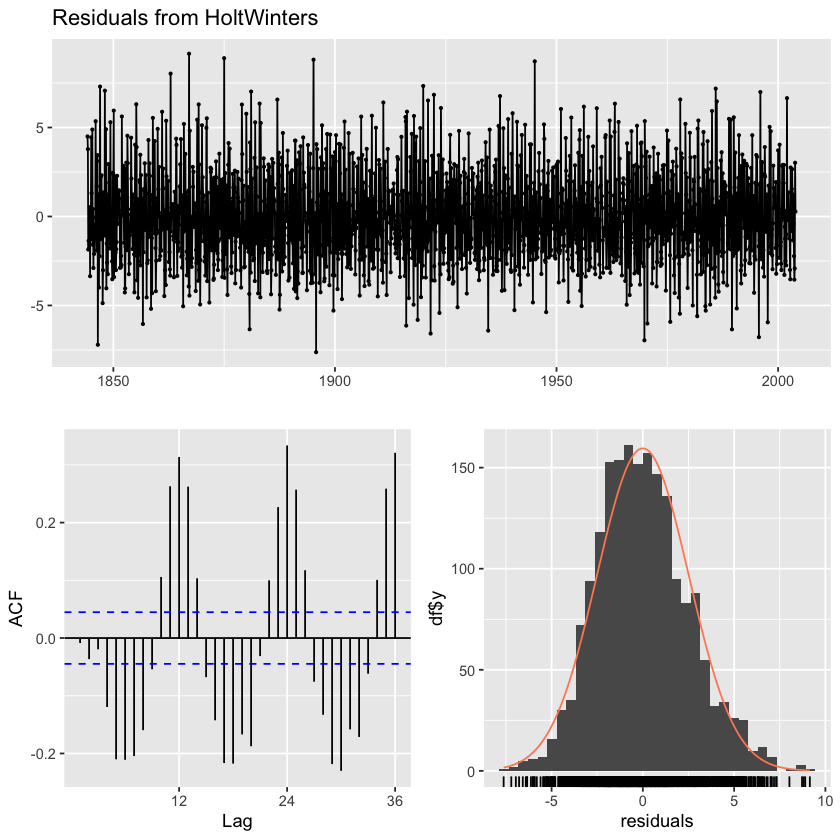

In [33]:
#Estimating a Double Exponential Smoothing model using the training set
Double_Exponential_Smoothing_model <- HoltWinters(train_data, beta = TRUE, gamma = FALSE)
summary(Double_Exponential_Smoothing_model)
# Make forecasts for the test set
forecast_data <- forecast(Double_Exponential_Smoothing_model, h = length(test_data))
forecast_data
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
#Residuals diagnostics
checkresiduals(Double_Exponential_Smoothing_model)

             Length Class  Mode     
fitted       7632   mts    numeric  
x            1920   ts     numeric  
alpha           1   -none- numeric  
beta            1   -none- logical  
gamma           1   -none- logical  
coefficients   14   -none- numeric  
seasonal        1   -none- character
SSE             1   -none- numeric  
call            4   -none- call     

         Point Forecast       Lo 80     Hi 80       Lo 95      Hi 95
Jan 2004      1.7296690   -1.848032  5.307370   -3.741953   7.201291
Feb 2004     -1.8819288   -9.806919  6.043062  -14.002156  10.238298
Mar 2004     -2.8891810  -16.129948 10.351586  -23.139187  17.360825
Apr 2004     -2.4564070  -21.830101 16.917287  -32.085916  27.173102
May 2004     -0.5969715  -26.824335 25.630392  -40.708263  39.514320
Jun 2004      1.0034164  -32.729718 34.736551  -50.586961  52.593794
Jul 2004      0.3571452  -41.481737 42.196028  -63.629904  64.344195
Aug 2004     -3.6612104  -54.164483 46.842063  -80.899301  73.576880
Sep 2004     -8.8033679  -68.495851 50.889115 -100.095143  82.488407
Oct 2004    -12.8637052  -82.241878 56.514467 -118.968464  93.241053
Nov 2004    -16.3812467  -95.917390 63.154896 -138.021281 105.258787
Dec 2004    -18.8812467 -109.026669 71.264176 -156.746773 118.984279

                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.001041954  2.790964  2.196502     -Inf      Inf  1.646665
Test set     14.943752876 16.491874 14.943753 168.6865 168.6865 11.202971
                   ACF1 Theil's U
Training set -0.5249491        NA
Test set      0.7329571  7.426405

	Ljung-Box test

data:  Residuals from HoltWinters
Q* = 771.24, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



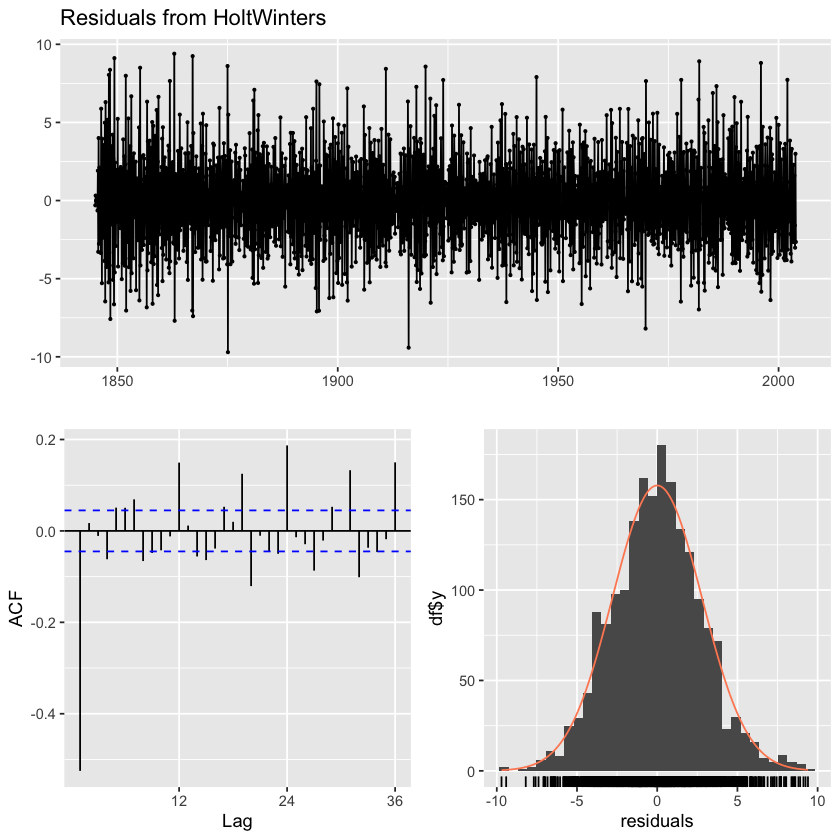

In [34]:
#Estimating a Triple Exponential Smoothing model using the training set
Triple_Exponential_Smoothing_model <- HoltWinters(train_data, beta = TRUE, gamma = TRUE)
summary(Triple_Exponential_Smoothing_model)
# Make forecasts for the test set
forecast_data <- forecast(Triple_Exponential_Smoothing_model, h = length(test_data))
forecast_data
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
#Residuals diagnostics
checkresiduals(Triple_Exponential_Smoothing_model)

In [35]:
#Fitting Naive method to training data
naive_model_monthly <- naive(train_data, h = length(test_data))
summary(naive_model_monthly)


Forecast method: Naive method

Model Information:
Call: naive(y = train_data, h = length(test_data)) 

Residual sd: 2.4392 

Error measures:
                       ME     RMSE      MAE  MPE MAPE     MASE      ACF1
Training set 0.0003126628 2.439161 2.013966 -Inf  Inf 1.509821 0.3559598

Forecasts:
         Point Forecast      Lo 80     Hi 80       Lo 95     Hi 95
Jan 2004            5.1  1.9740898  8.225910   0.3193329  9.880667
Feb 2004            5.1  0.6792954  9.520705  -1.6608843 11.860884
Mar 2004            5.1 -0.3142353 10.514235  -3.1803584 13.380358
Apr 2004            5.1 -1.1518204 11.351820  -4.4613343 14.661334
May 2004            5.1 -1.8897477 12.089748  -5.5898967 15.789897
Jun 2004            5.1 -2.5568850 12.756885  -6.6101951 16.810195
Jul 2004            5.1 -3.1703811 13.370381  -7.5484563 17.748456
Aug 2004            5.1 -3.7414093 13.941409  -8.4217686 18.621769
Sep 2004            5.1 -4.2777307 14.477731  -9.2420014 19.442001
Oct 2004            5.1 -4.784

In [36]:
#Forecast for 12 months using the fitted model
forecast_data <- forecast(naive_model_monthly, h = 12)
forecast_data
print(forecast_data$mean)

         Point Forecast      Lo 80     Hi 80       Lo 95     Hi 95
Jan 2004            5.1  1.9740898  8.225910   0.3193329  9.880667
Feb 2004            5.1  0.6792954  9.520705  -1.6608843 11.860884
Mar 2004            5.1 -0.3142353 10.514235  -3.1803584 13.380358
Apr 2004            5.1 -1.1518204 11.351820  -4.4613343 14.661334
May 2004            5.1 -1.8897477 12.089748  -5.5898967 15.789897
Jun 2004            5.1 -2.5568850 12.756885  -6.6101951 16.810195
Jul 2004            5.1 -3.1703811 13.370381  -7.5484563 17.748456
Aug 2004            5.1 -3.7414093 13.941409  -8.4217686 18.621769
Sep 2004            5.1 -4.2777307 14.477731  -9.2420014 19.442001
Oct 2004            5.1 -4.7849961 14.984996 -10.0177969 20.217797
Nov 2004            5.1 -5.2674713 15.467471 -10.7556791 20.955679
Dec 2004            5.1 -5.7284706 15.928471 -11.4607167 21.660717

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
2004 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1


                       ME     RMSE      MAE      MPE     MAPE     MASE
Training set 0.0003126628 2.439161 2.013966     -Inf      Inf 1.509821
Test set     4.4000000000 5.696490 4.500000 37.15516 39.37738 3.373541
                  ACF1 Theil's U
Training set 0.3559598        NA
Test set     0.7195060  2.086242

	Ljung-Box test

data:  Residuals from Naive method
Q* = 7489.3, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



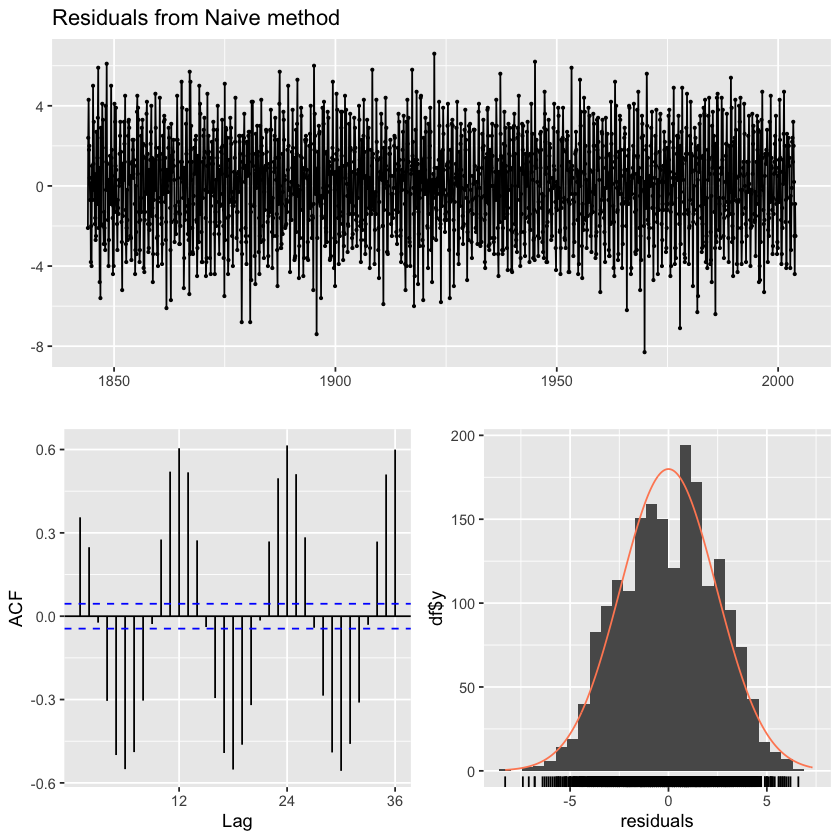

In [37]:
#Evaluating the forecasts against the actual data for 2004
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
checkresiduals(naive_model_monthly)

In [38]:
#Fiting the Simple Average Method model
simple_avg_model <- meanf(train_data,h = length(test_data))
summary(simple_avg_model)


Forecast method: Mean

Model Information:
$mu
[1] 8.494531

$mu.se
[1] 0.08731623

$sd
[1] 3.826006

$bootstrap
[1] FALSE

$call
meanf(y = train_data, h = length(test_data))

attr(,"class")
[1] "meanf"

Error measures:
                       ME     RMSE    MAE  MPE MAPE     MASE      ACF1
Training set 3.523786e-16 3.825009 3.3484 -Inf  Inf 2.510215 0.7962941

Forecasts:
         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Jan 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Feb 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Mar 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Apr 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
May 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Jun 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Jul 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Aug 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Sep 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Oct 2004       8

In [39]:
#Forecasting for 12 months using the fitted model
forecast_data <- forecast(simple_avg_model, h = 12)
forecast_data
print(forecast_data$mean)

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Jan 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Feb 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Mar 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Apr 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
May 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Jun 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Jul 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Aug 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Sep 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Oct 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Nov 2004       8.494531 3.588342 13.40072 0.9890118 16.00005
Dec 2004       8.494531 3.588342 13.40072 0.9890118 16.00005

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2004 8.494531 8.494531 8.494531 8.494531 8.494531 8.494531 8.494531 8.494531
          Sep      Oct      Nov      Dec
2004 8.494531 8.494531 8.494531 8.494531


                       ME     RMSE      MAE       MPE     MAPE     MASE
Training set 3.523786e-16 3.825009 3.348400      -Inf      Inf 2.510215
Test set     1.005469e+00 3.755125 3.083333 -4.674009 34.53925 2.311501
                  ACF1 Theil's U
Training set 0.7962941        NA
Test set     0.7195060  1.624726

	Ljung-Box test

data:  Residuals from Mean
Q* = 17938, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



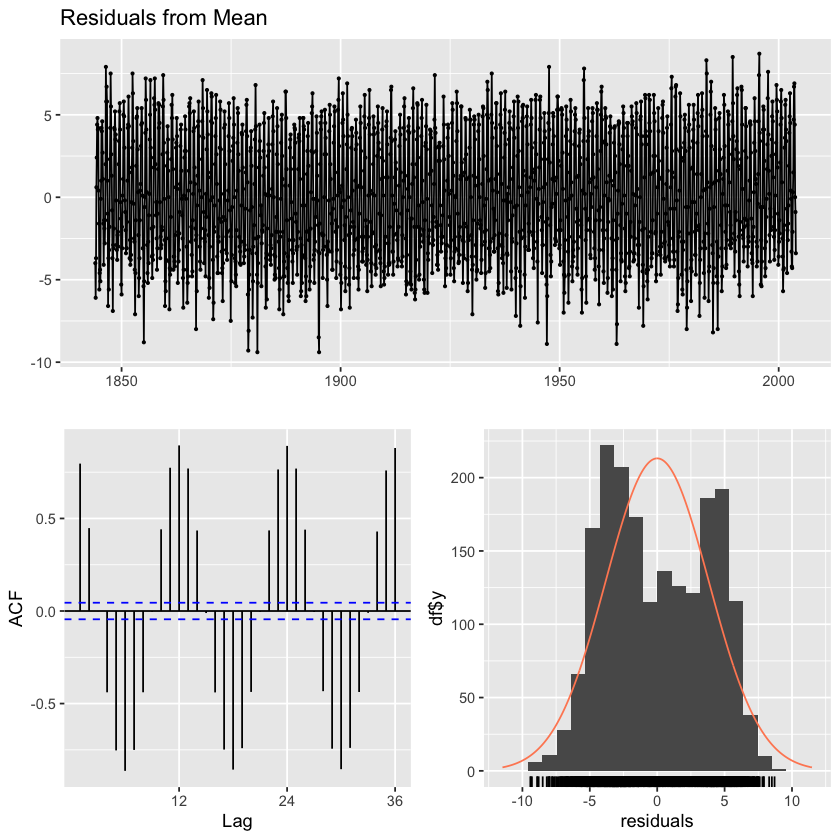

In [40]:
#Evaluating the forecasts against the actual data for 2019
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
checkresiduals(simple_avg_model)

In [41]:
#Moving average method
#Fit an MA model to the training data
ma_model <- ma(train_data, order =1 )
summary(ma_model)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.900   5.300   8.200   8.495  12.100  17.200 

In [42]:
#Generating a 12-month forecast using the fitted model
forecast_data <- forecast(ma_model, h = 12)
print(forecast_data)
print(forecast_data$mean)

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Jan 2004       4.826801  3.268027  6.385575  2.442862  7.210740
Feb 2004       5.029996  3.470661  6.589330  2.645200  7.414791
Mar 2004       6.014942  4.455044  7.574840  3.629283  8.400601
Apr 2004       7.882274  6.321808  9.442741  5.495747 10.268802
May 2004      10.613344  9.052306 12.174383  8.225942 13.000747
Jun 2004      13.328619 11.767004 14.890234 10.940336 15.716903
Jul 2004      14.709242 13.147047 16.271437 12.320071 17.098414
Aug 2004      14.530972 12.968193 16.093752 12.140908 16.921037
Sep 2004      12.760338 11.196971 14.323706 10.369374 15.151303
Oct 2004       9.918806  8.354846 11.482766  7.526935 12.310676
Nov 2004       6.877779  5.313222  8.442335  4.484996  9.270561
Dec 2004       5.412854  3.847697  6.978011  3.019153  7.806555
           Jan       Feb       Mar       Apr       May       Jun       Jul
2004  4.826801  5.029996  6.014942  7.882274 10.613344 13.328619 14.709242
           Aug    

                     ME      RMSE       MAE      MPE    MAPE      MASE
Training set 0.01770418 1.2112392 0.9465906     -Inf     Inf 0.7096361
Test set     0.17450272 0.7804156 0.6675100 1.792123 7.67026 0.5004161
                   ACF1 Theil's U
Training set  0.1908923        NA
Test set     -0.4164430 0.3343079

	Ljung-Box test

data:  Residuals
Q* = 17938, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



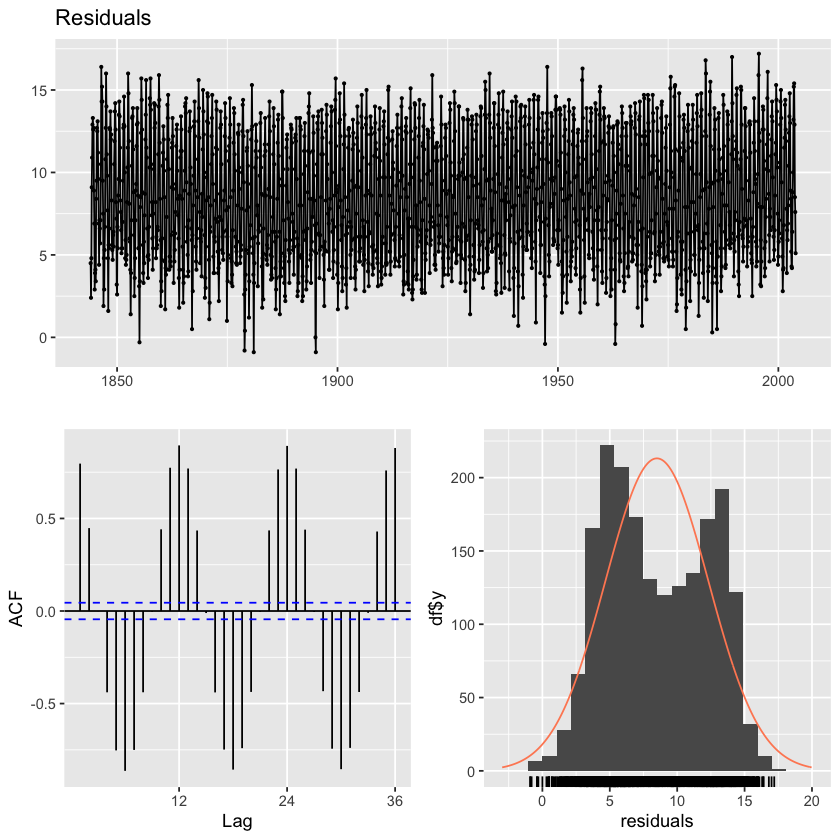

In [43]:
#Evaluate the forecasts against the actual data for 2003
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
checkresiduals(ma_model)

In [44]:
#model building for yearly dataset
#Splitting the data into training and test data-sets
train_data <- window(yearly_data_ts_object, end = c(2003))
test_data <- window(yearly_data_ts_object, start=c(2004))

In [45]:
#Fitting an ARIMA model to the training data for yearly data
library(forecast)
arima_model_yearly <- auto.arima(train_data,D=12)
summary(arima_model_yearly) 

Series: train_data 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.8274
s.e.   0.0412

sigma^2 = 0.2149:  log likelihood = -103.46
AIC=210.93   AICc=211   BIC=217.06

Training set error measures:
                     ME      RMSE       MAE         MPE     MAPE      MASE
Training set 0.01802921 0.4607088 0.3507608 -0.07201756 4.165348 0.7113643
                    ACF1
Training set -0.03212209

In [46]:
#Forecasting for 12 months using the fitted model
forecast_data <- forecast(arima_model_yearly, h = 1)
forecast_data
print(forecast_data$mean)

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2004       9.154549 8.560402 9.748696 8.245879 10.06322

Time Series:
Start = 2004 
End = 2004 
Frequency = 1 
[1] 9.154549


                     ME      RMSE       MAE         MPE     MAPE      MASE
Training set 0.01802921 0.4607088 0.3507608 -0.07201756 4.165348 0.7113643
Test set     0.34545093 0.3454509 0.3454509  3.63632558 3.636326 0.7005956
                    ACF1
Training set -0.03212209
Test set              NA

	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 10, df = 9, p-value = 0.3505

Model df: 1.   Total lags used: 10



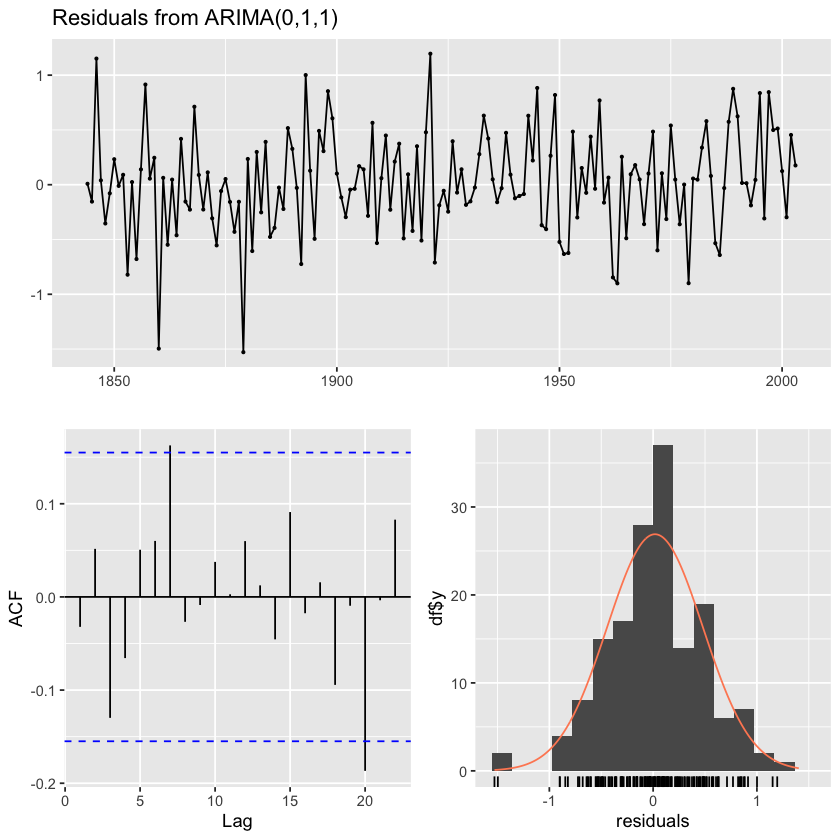

In [47]:
#Evaluating the forecasts against the actual data for 2004
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
checkresiduals(arima_model_yearly)

In [48]:
#Exponential smoothing model
exponential_smoothing_model_yearly <- ets(train_data)
summary(exponential_smoothing_model_yearly)

ETS(A,N,N) 

Call:
 ets(y = train_data) 

  Smoothing parameters:
    alpha = 0.1682 

  Initial states:
    l = 8.7104 

  sigma:  0.4636

     AIC     AICc      BIC 
570.0191 570.1729 579.2446 

Training set error measures:
                     ME      RMSE       MAE        MPE     MAPE      MASE
Training set 0.01627885 0.4606912 0.3530613 -0.0935001 4.192907 0.7160299
                    ACF1
Training set -0.03098102

In [49]:
#Forecasting for 12 months using the fitted model
forecast_data <- forecast(exponential_smoothing_model_yearly, h = 1)
forecast_data
print(forecast_data$mean)

     Point Forecast    Lo 80    Hi 80    Lo 95   Hi 95
2004       9.148564 8.554439 9.742688 8.239929 10.0572

Time Series:
Start = 2004 
End = 2004 
Frequency = 1 
[1] 9.148564


                     ME      RMSE       MAE        MPE     MAPE      MASE
Training set 0.01627885 0.4606912 0.3530613 -0.0935001 4.192907 0.7160299
Test set     0.35143644 0.3514364 0.3514364  3.6993309 3.699331 0.7127346
                    ACF1
Training set -0.03098102
Test set              NA

	Ljung-Box test

data:  Residuals from ETS(A,N,N)
Q* = 9.7191, df = 10, p-value = 0.4655

Model df: 0.   Total lags used: 10



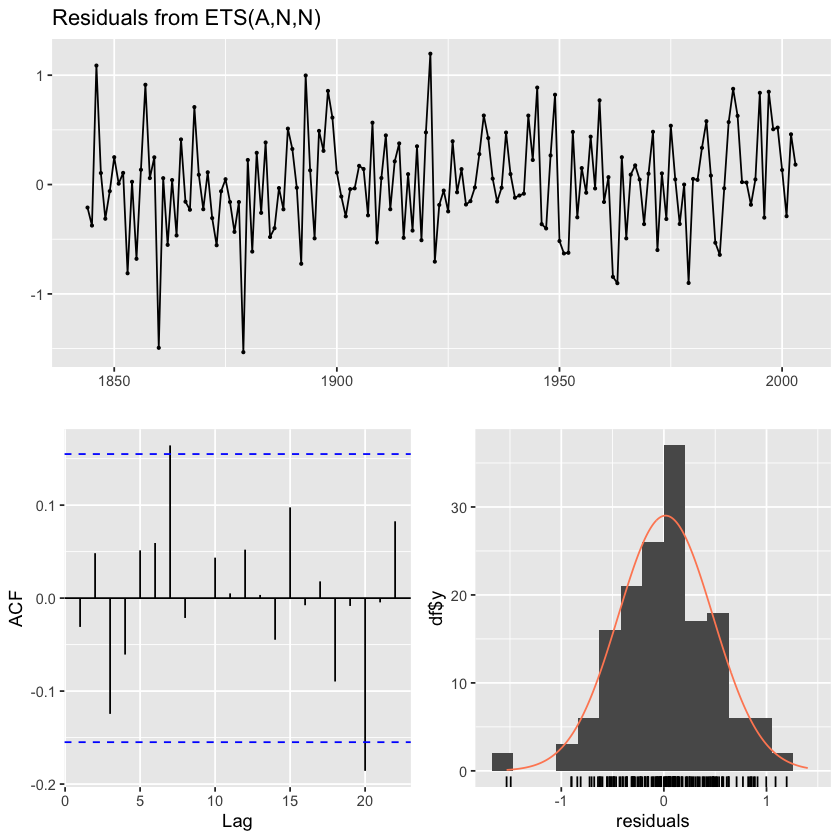

In [50]:
#Evaluating the forecasts against the actual data for 2004
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
checkresiduals(exponential_smoothing_model_yearly)

             Length Class  Mode     
fitted       474    mts    numeric  
x            160    ts     numeric  
alpha          1    -none- numeric  
beta           1    -none- logical  
gamma          1    -none- logical  
coefficients   2    -none- numeric  
seasonal       1    -none- character
SSE            1    -none- numeric  
call           4    -none- call     

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2004       9.652967 8.993441 10.31249 8.644309 10.66162

                      ME      RMSE       MAE        MPE     MAPE      MASE
Training set  0.03343951 0.5140882 0.4039921  0.1384319 4.775598 0.8193206
Test set     -0.15296667 0.1529667 0.1529667 -1.6101755 1.610175 0.3102258
                  ACF1
Training set 0.2119217
Test set            NA

	Ljung-Box test

data:  Residuals from HoltWinters
Q* = 21.844, df = 10, p-value = 0.01592

Model df: 0.   Total lags used: 10



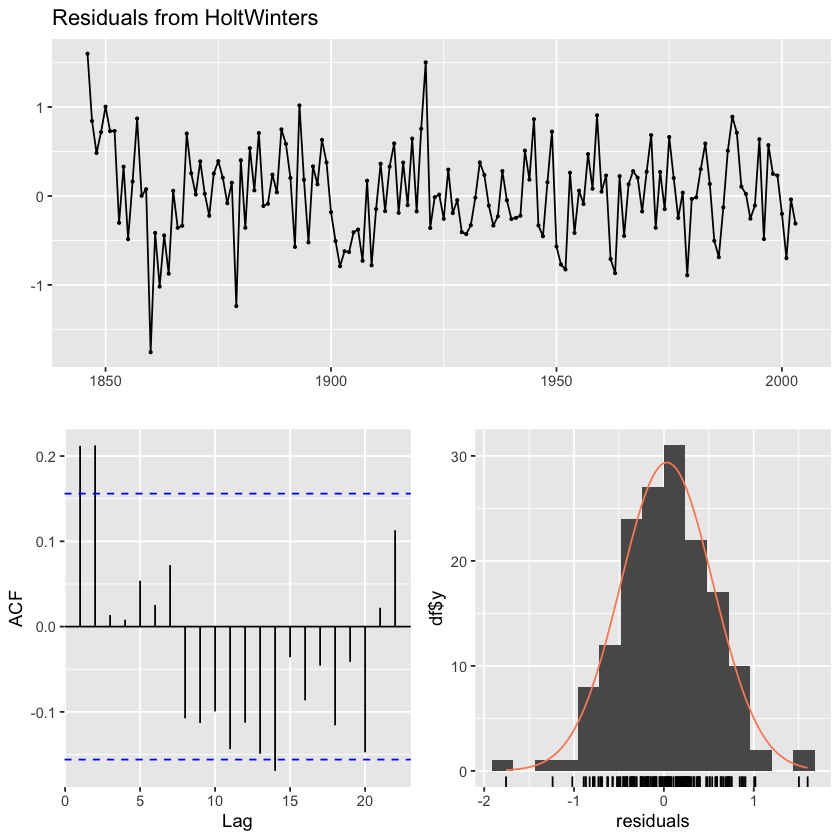

In [51]:
#Estimating a Double Exponential Smoothing model using the training set
Double_Exponential_Smoothing_model_yearly <- HoltWinters(train_data, beta = TRUE, gamma = FALSE)
summary(Double_Exponential_Smoothing_model_yearly)
# Make forecasts for the test set
forecast_data <- forecast(Double_Exponential_Smoothing_model_yearly, h = length(test_data))
forecast_data
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
#Residuals diagnostics
checkresiduals(Double_Exponential_Smoothing_model_yearly)

In [52]:
#Fitting Naive method to training data
naive_model_yearly <- naive(train_data, h = length(test_data))
summary(naive_model_yearly)


Forecast method: Naive method

Model Information:
Call: naive(y = train_data, h = length(test_data)) 

Residual sd: 0.6095 

Error measures:
                      ME      RMSE       MAE        MPE     MAPE MASE
Training set 0.005031447 0.6094641 0.4930818 -0.2094051 5.856786    1
                   ACF1
Training set -0.5321403

Forecasts:
     Point Forecast   Lo 80    Hi 80    Lo 95    Hi 95
2004            9.3 8.51894 10.08106 8.105472 10.49453

In [53]:
# Forecast for 12 months using the fitted model
forecast_data <- forecast(naive_model_yearly, h = 1)
forecast_data
print(forecast_data$mean)

     Point Forecast   Lo 80    Hi 80    Lo 95    Hi 95
2004            9.3 8.51894 10.08106 8.105472 10.49453

Time Series:
Start = 2004 
End = 2004 
Frequency = 1 
[1] 9.3


                      ME      RMSE       MAE        MPE     MAPE      MASE
Training set 0.005031447 0.6094641 0.4930818 -0.2094051 5.856786 1.0000000
Test set     0.200000000 0.2000000 0.2000000  2.1052632 2.105263 0.4056122
                   ACF1
Training set -0.5321403
Test set             NA

	Ljung-Box test

data:  Residuals from Naive method
Q* = 57.313, df = 10, p-value = 1.164e-08

Model df: 0.   Total lags used: 10



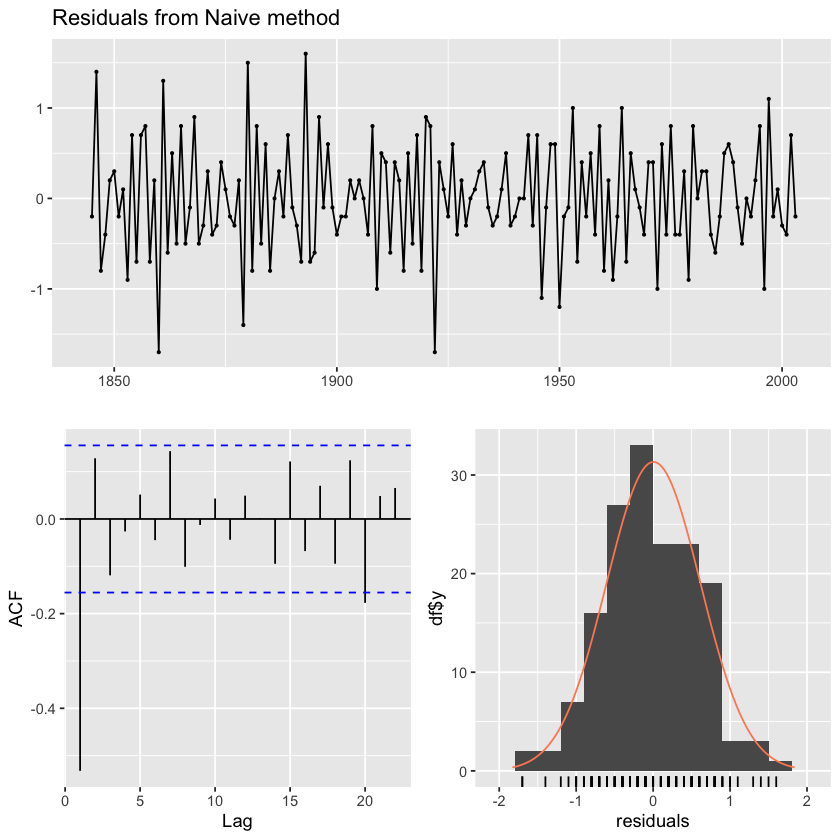

In [54]:
#Evaluating the forecasts against the actual data for 2004
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
checkresiduals(naive_model_yearly)

In [55]:
#Fiting the Simple Average Method model
simple_avg_model_year <- meanf(train_data,h = length(test_data))
summary(simple_avg_model_year)


Forecast method: Mean

Model Information:
$mu
[1] 8.4825

$mu.se
[1] 0.04118479

$sd
[1] 0.520951

$bootstrap
[1] FALSE

$call
meanf(y = train_data, h = length(test_data))

attr(,"class")
[1] "meanf"

Error measures:
                       ME      RMSE      MAE        MPE     MAPE      MASE
Training set 1.099076e-17 0.5193205 0.402125 -0.3820398 4.783021 0.8155341
                  ACF1
Training set 0.3079116

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2004         8.4825 7.809997 9.155003 7.450414 9.514586

In [56]:
#Forecasting for 12 months using the fitted model
forecast_data <- forecast(simple_avg_model_year, h = 1)
forecast_data
print(forecast_data$mean)

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2004         8.4825 7.809997 9.155003 7.450414 9.514586

Time Series:
Start = 2004 
End = 2004 
Frequency = 1 
[1] 8.4825


                       ME      RMSE      MAE        MPE      MAPE      MASE
Training set 1.099076e-17 0.5193205 0.402125 -0.3820398  4.783021 0.8155341
Test set     1.017500e+00 1.0175000 1.017500 10.7105263 10.710526 2.0635523
                  ACF1
Training set 0.3079116
Test set            NA

	Ljung-Box test

data:  Residuals from Mean
Q* = 114.1, df = 10, p-value < 2.2e-16

Model df: 0.   Total lags used: 10



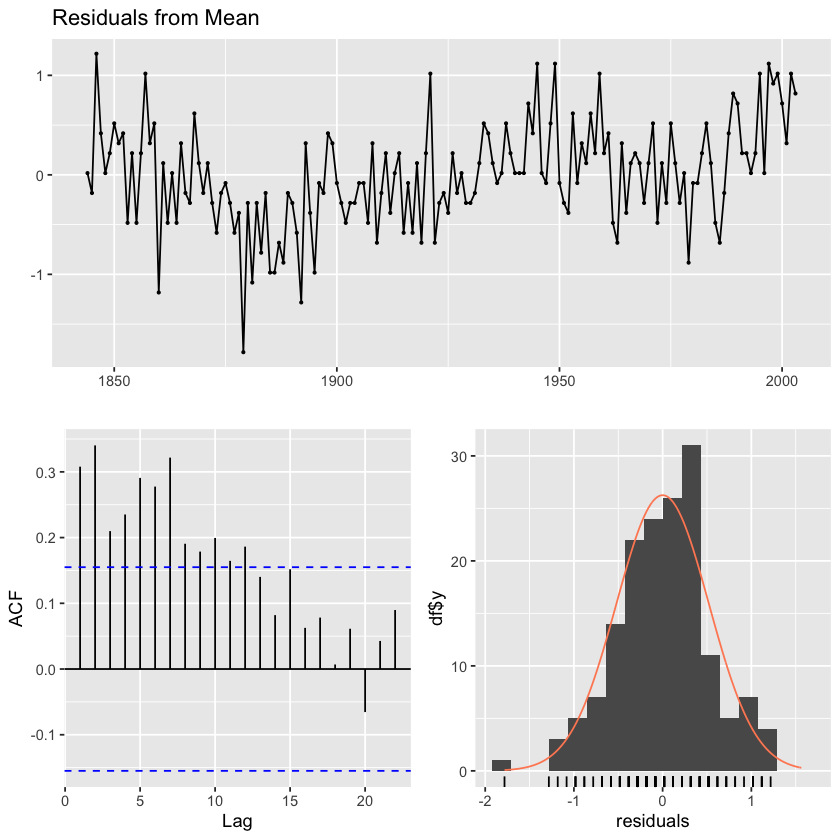

In [57]:
#Evaluating the forecasts against the actual data for 2019
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
checkresiduals(simple_avg_model_year)

In [58]:
#Moving average method
#Fit an MA model to the training data
ma_model_year <- ma(train_data, order =1 )
summary(ma_model_year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.700   8.200   8.500   8.482   8.800   9.700 

In [59]:
#Generating a 12-month forecast using the fitted model
forecast_data <- forecast(ma_model_year, h = 1)
print(forecast_data)
print(forecast_data$mean)

     Point Forecast    Lo 80    Hi 80    Lo 95   Hi 95
2004       9.148564 8.554439 9.742688 8.239929 10.0572
Time Series:
Start = 2004 
End = 2004 
Frequency = 1 
[1] 9.148564


                     ME      RMSE       MAE        MPE     MAPE      MASE
Training set 0.01627885 0.4606912 0.3530613 -0.0935001 4.192907 0.7160299
Test set     0.35143644 0.3514364 0.3514364  3.6993309 3.699331 0.7127346
                    ACF1
Training set -0.03098102
Test set              NA

	Ljung-Box test

data:  Residuals
Q* = 114.1, df = 10, p-value < 2.2e-16

Model df: 0.   Total lags used: 10



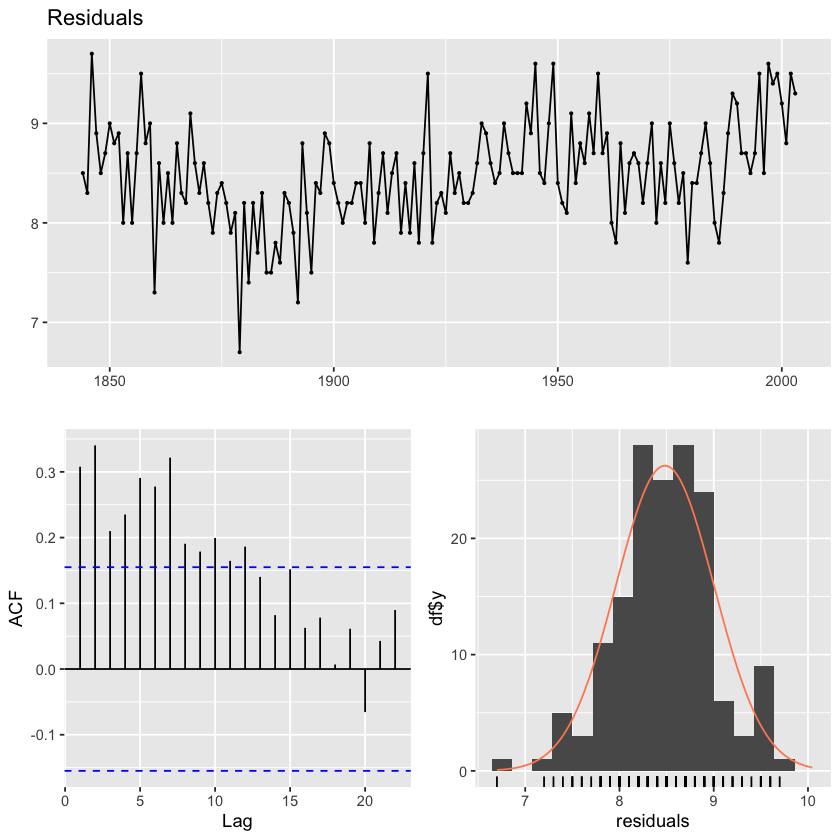

In [60]:
#Evaluating the forecasts against the actual data for 2003
accuracy_data <- accuracy(forecast_data, test_data)
print(accuracy_data)
checkresiduals(ma_model_year)